## Lending Club Analysis



In [35]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Reading and converting 'loan.csv' file to DataFrame
loan = pd.read_csv("loan.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [77]:
#Auto EDA
# !pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# !pip install pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
design_report = ProfileReport(df)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Understanding

In [37]:
# df
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Understanding first few rows of df
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [39]:
# Understanding few columns of df
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

It has been observed from the above dataset that columns "loan_amount", "total_pymnt , "term", "interest rate", "grade", "sub grade", "annual income", "purpose of the loan" etc."

Whereas **target variable** across the independent variable is **loan_status**. The strategy is to figure out compare the average default rates across various independent variables and identify the  ones that affect default rate the most.

## Data Cleaning
Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.


In [40]:
# Finding all the missing values of each column in df
sum_missing_val = loan.isnull().sum()
# Percentage of missing values
per_missing_val = round(sum_missing_val/len(loan.index),2)*100
per_missing_val

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [41]:
# Fetching name of the columns with 100% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [42]:
# Removing missing columns out of df
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


After removing columns with 100% missing values, now let's remove more missing values columns

In [43]:
# Percentage of next missing values
per__next_missing_val = round(loan.isnull().sum()/len(loan.index),2)*100
per__next_missing_val

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [44]:
# After summarising we got more missing values
# So, there are now 2 columns having approx 32% and 64% missing values - 
# "desc" and "mths_since_last_delinq" are those columns

# let's have a look at a few entries in the columns
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The column description contains the comments the applicant had written while applying for the loan. Although one can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.), we will not use this column in this analysis.

Secondly, months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.

Thus let's drop the two columns.

In [45]:
# dropping the two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [46]:
# summarise number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

There are some more columns with missing values, but let's ignore them for now (since we are not doing any modeling, we don't need to impute all missing values anyway).

But let's check whether some rows have a large number of missing values.

In [47]:
# missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [48]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

Thus there are no missing values rows. So, the dataset looks more clear.

In [49]:
# Now let's check the format of dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [50]:
# Let's format the variable type of "emp_length"
# First, let's drop the missing values from the column (to prevent error)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

Now, the data gets formatted into the required pattern i.e. We have got numerical as well as categorical variables

## Data Analysis

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables.

In [51]:
# Let's put the customer behaviour variables into a "customer_behavour_var" variable
customer_behavour_var=["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
customer_behavour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [52]:
# let's now remove the behaviour variables from analysis
df = loan.drop(customer_behavour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [53]:
# We will not be able to use the variables 'title', 'url', 'zip_code', 'addr_state','purpose' 
# Thus let's remove them from df
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

Now, we are left with 27 columns from which can look at the "target variable" 

In [55]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [56]:
# So, there we get list dataset according to the "Fully paid", "Charged Off" and "Current" loan_status
# As we now under "Current" loan_status, we are not getting any valuable insights as they don't have any updated status 
# So, we filter out that row from df

# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37544 non-null  int64  
 1   member_id                   37544 non-null  int64  
 2   loan_amnt                   37544 non-null  int64  
 3   funded_amnt                 37544 non-null  int64  
 4   funded_amnt_inv             37544 non-null  float64
 5   term                        37544 non-null  object 
 6   int_rate                    37544 non-null  object 
 7   installment                 37544 non-null  float64
 8   grade                       37544 non-null  object 
 9   sub_grade                   37544 non-null  object 
 10  emp_title                   36136 non-null  object 
 11  emp_length                  37544 non-null  int64  
 12  home_ownership              37544 non-null  object 
 13  annual_inc                  375

In [58]:
df.var()

id                            4.403551e+10
member_id                     7.049959e+10
loan_amnt                     5.408277e+07
funded_amnt                   5.035771e+07
funded_amnt_inv               4.947890e+07
installment                   4.363965e+04
emp_length                    1.157191e+01
annual_inc                    4.183112e+09
loan_status                   1.231281e-01
dti                           4.436294e+01
collections_12_mths_ex_med    0.000000e+00
policy_code                   1.232628e-32
acc_now_delinq                0.000000e+00
chargeoff_within_12_mths      0.000000e+00
delinq_amnt                   0.000000e+00
pub_rec_bankruptcies          4.032016e-02
tax_liens                     0.000000e+00
dtype: float64

In [59]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

## Univariate Analysis

In [60]:
# Let's find the correlaion
corr = df.corr()
corr

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,loan_status,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993497,0.125203,0.135822,0.237490,0.079642,0.107820,0.008949,0.041580,0.091783,NaN,NaN,NaN,NaN,NaN,-0.010225,NaN
member_id,0.993497,1.000000,0.125280,0.135138,0.247598,0.074751,0.112406,0.010072,0.038833,0.093152,NaN,NaN,NaN,NaN,NaN,-0.009929,NaN
loan_amnt,0.125203,0.125280,1.000000,0.981603,0.936871,0.931686,0.148267,0.266282,0.062680,0.061402,NaN,NaN,NaN,NaN,NaN,-0.031758,NaN
funded_amnt,0.135822,0.135138,0.981603,1.000000,0.955300,0.957721,0.147930,0.261959,0.059535,0.061251,NaN,NaN,NaN,NaN,NaN,-0.032708,NaN
funded_amnt_inv,0.237490,0.247598,0.936871,0.955300,1.000000,0.904110,0.158852,0.249320,0.040097,0.070007,NaN,NaN,NaN,NaN,NaN,-0.037598,NaN
installment,0.079642,0.074751,0.931686,0.957721,0.904110,1.000000,0.121101,0.264684,0.029868,0.050727,NaN,NaN,NaN,NaN,NaN,-0.029352,NaN
emp_length,0.107820,0.112406,0.148267,0.147930,0.158852,0.121101,1.000000,0.111107,0.016656,0.048619,NaN,NaN,NaN,NaN,NaN,0.063212,NaN
annual_inc,0.008949,0.010072,0.266282,0.261959,0.249320,0.264684,0.111107,1.000000,-0.038501,-0.123582,NaN,NaN,NaN,NaN,NaN,-0.012378,NaN
loan_status,0.041580,0.038833,0.062680,0.059535,0.040097,0.029868,0.016656,-0.038501,1.000000,0.042803,NaN,NaN,NaN,NaN,NaN,0.045625,NaN
dti,0.091783,0.093152,0.061402,0.061251,0.070007,0.050727,0.048619,-0.123582,0.042803,1.000000,NaN,NaN,NaN,NaN,NaN,0.006733,NaN


In [61]:
# Let's find univariate analysis of "annual_inc" salary
df['loan_amnt']

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 37544, dtype: int64

<Axes: xlabel='loan_amnt', ylabel='Density'>

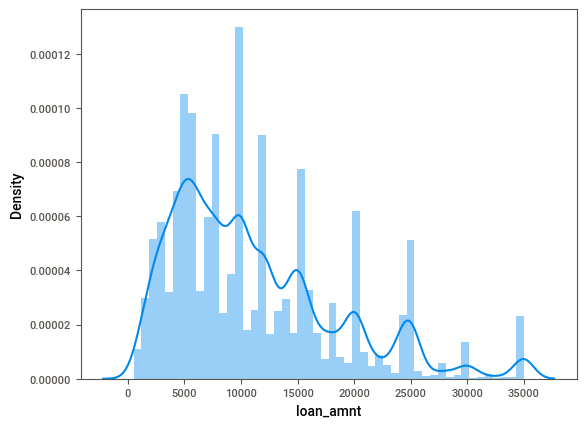

In [62]:
sns.distplot(df['loan_amnt'])

The above distplot represents the distribution of data against the density distriution of "loan_amnt" column. It has been observed from here that data varies from average to high or higher range for loan amount column.

The peaks here indicates the points fully paid and charged-off variables under loan_amnt column.


## Bivariate Analysis


<Axes: xlabel='loan_status', ylabel='annual_inc'>

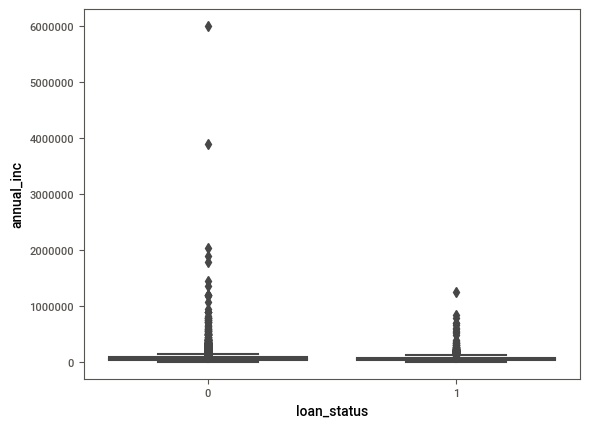

In [63]:
#Analyze the relationship between loan status and salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=df)

<Axes: xlabel='loan_status', ylabel='annual_inc'>

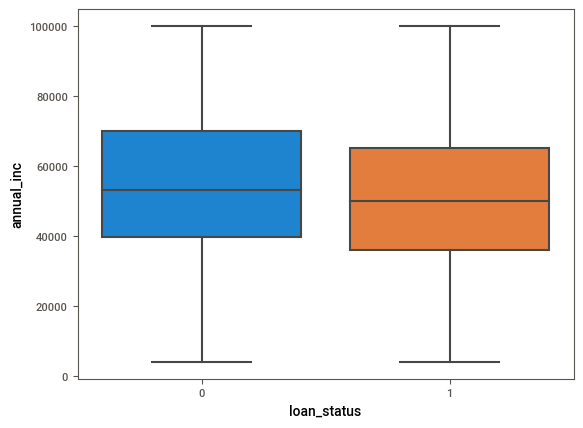

In [64]:
# It is hard to find the analysis between the loan status and salary
# So, we remove ouliners to get the best analysis
# As it signifies the e^6 value of salary so we will find values less than that to get best visualization 

# Let's create a temp df 
temp = df[df['annual_inc'] < 100000]

#Analyze the relationship between loan status and salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=temp)

From the above relationship we find a correlation between the annual salary and loan status. It is also analyzing that median for fully paid is higher than those of defaulted ones. It may conclude the concept that employees with higher salaries can fully pay their loans as compared to the average earners.

## Segmented Univariate Analysis
We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

In [65]:
# lets define a function to plot loan_status across categorical variables (grades)
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

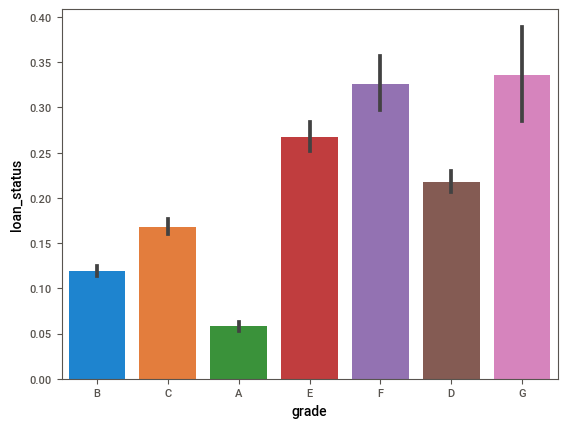

In [66]:
# compare default rates across grade of loan
plot_cat('grade')

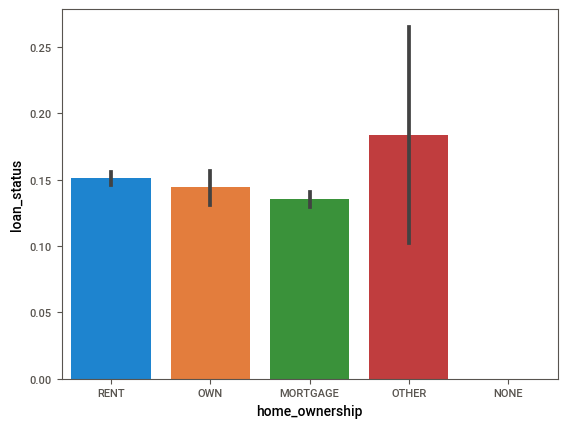

In [67]:
# home ownership: not a great discriminator
plot_cat('home_ownership')

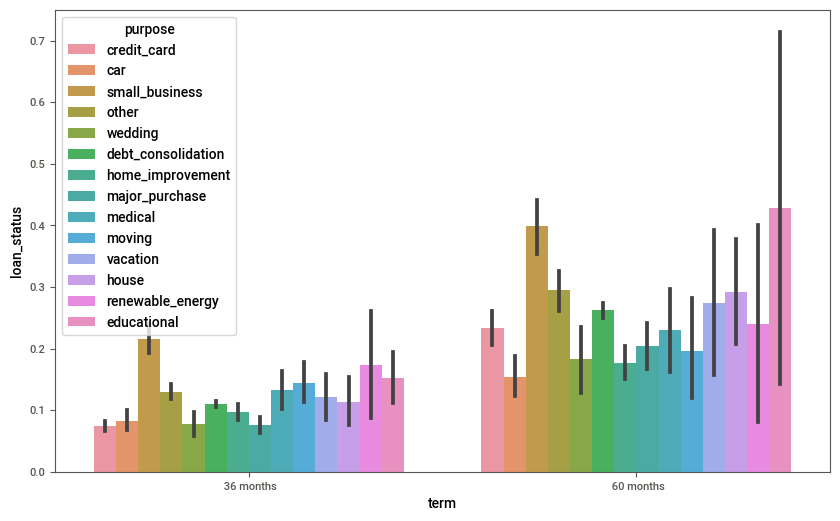

In [69]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

In [ ]:
# In this way we can analyse from the above visualization that for which purpose loans are either majorly fully paid.

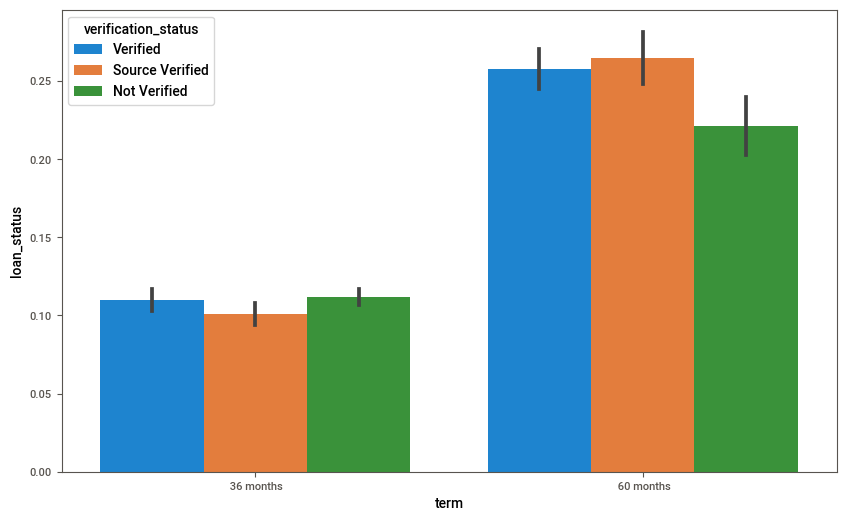

In [74]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='verification_status', data=df)
    plt.show()

    
plot_segmented('term')

In [75]:
# This indicates that with the time passes or term increases more source verified loans got fully paid rather that of short term period loans.
